In [1]:
import datetime
import os

import numpy  as np
import pandas as pd

In [2]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib notebook
###%matplotlib inline

In [53]:
# Variables

dataDir   = '../Data'
pickleDir = '../Data/Pickle'
inputFile = '../Data/Fields/D11.csv'
testFile  = '../Data/testExt.csv'
trainFile = '../Data/trainExt.csv'


In [4]:
# Read train data if enable
if (False) :
    print('input datas:',datetime.datetime.now())
    frame = pd.read_csv(inputFile)
    print('end input',datetime.datetime.now())
    print(frame.tail())

In [5]:
# Read summary on user_id datas
au = pd.read_pickle(os.path.join(pickleDir,'Result-01','trans01-user-id-all.pck'))
au.shape

(1198786, 25)

In [6]:
au.head()

,user_id,count0,countCnt0,count1,countCnt1,b0n0,b0n1,b0n2,b0n3,b0n4,...,b0v0,b0v1,b0v2,b0v3,b0v4,b1v0,b1v1,b1v2,b1v3,b1v4
user_id,,,,,,,,,,,,,,,,,,,,,
0,0,6,7,NaN,NaN,72,19,28,40,56,...,2,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,1,4,4,NaN,NaN,20,60,-1,-1,-1,...,3,1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN
2,2,19,29,NaN,NaN,18,91,96,94,95,...,7,6,4,3,3,NaN,NaN,NaN,NaN,NaN
3,3,8,8,NaN,NaN,18,94,2,5,47,...,2,2,1,1,1,NaN,NaN,NaN,NaN,NaN
4,4,10,10,NaN,NaN,71,73,15,18,21,...,3,2,1,1,1,NaN,NaN,NaN,NaN,NaN


C:\Anaconda3-64\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


<IPython.core.display.Javascript object>


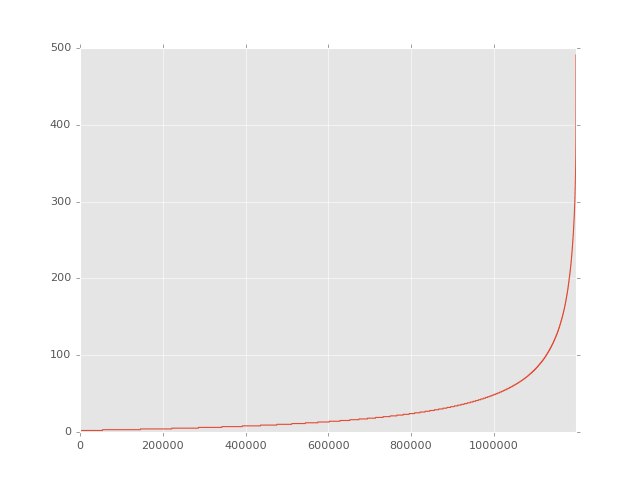

In [9]:
# Draw sort count0 and find one half max-mim
#au.plot(kind='hist',x='count1'/'count0')
xx = pd.DataFrame(au.count0/au.countCnt0,columns=['div'])
yy = au.count0.copy(); 
yy.sort()
yy.plot(kind='line',use_index=False)

Index(['user_id', 'count0', 'countCnt0', 'count1', 'countCnt1', 'b0n0', 'b0n1',
       'b0n2', 'b0n3', 'b0n4', 'b1n0', 'b1n1', 'b1n2', 'b1n3', 'b1n4', 'b0v0',
       'b0v1', 'b0v2', 'b0v3', 'b0v4', 'b1v0', 'b1v1', 'b1v2', 'b1v3', 'b1v4',
       'step'],
      dtype='object')
Index(['user_id'], dtype='object')
188998


<IPython.core.display.Javascript object>


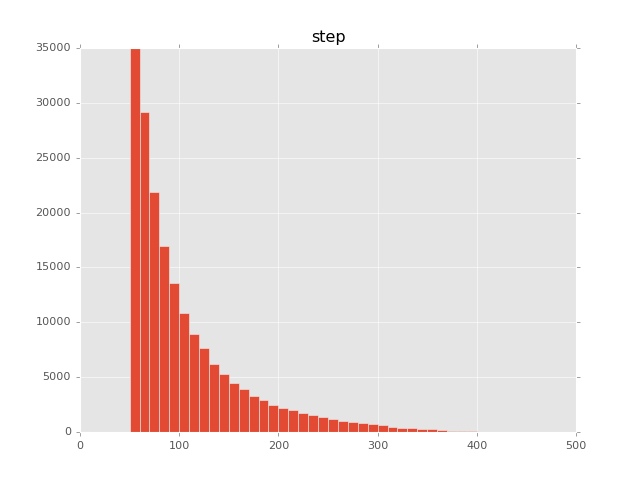

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2836D2EB8>]], dtype=object)

In [51]:
# Draw stepping count0 with bins=10 and count0>50
print(au.columns)
au['step']=(au['count0']/10)*10
zz=au[['user_id']]; print(zz.columns)
zz=zz[au.count0>50].groupby(['user_id'])
print(len(zz))
au[au.count0>50].hist('step',bins=[i for i in range(0,500,10)])

In [57]:
# Read test file (2-4 cols)
test = pd.read_csv(testFile,usecols=['id','user_id'],dtype=int)
test.shape

(2528243, 2)

In [121]:
# Count user_id with (>50), size test file and count (>50) user_id in test file (about 680383=26.9%)
type(zz.count())
#zd=zz.agg('count'); print(zd.head())
zd=zz.count().reset_index(); zd.tail()
zztest=zd.merge(test,how='inner',on='user_id'); 
testzz=test.merge(zd,how='inner',on='user_id')
print(zd.shape)
print(test.shape)
print(zztest.shape)
print(testzz.shape)

(188998, 1)
(2528243, 2)
(680383, 2)
(680383, 2)


In [120]:
# Count comparing (and procent compare) between notbook and book datas

auz = au.query('count0<50')
#auz = au
y,z=0,0
x='(b0n0==b1n0)&(b0n0>0)';y+=auz.query(x).shape[0]; print(y);
x='(b0n1==b1n0)&(b0n1>0)';y+=auz.query(x).shape[0]; print(y);
x='(b0n2==b1n0)&(b0n2>0)';y+=auz.query(x).shape[0]; print(y);
x='(b0n3==b1n0)&(b0n3>0)';y+=auz.query(x).shape[0]; print(y);
x='(b0n4==b1n0)&(b0n4>0)';y+=auz.query(x).shape[0]; print(y);
print('->'*10,y,y/auz.shape[0]); z+=y
y = 0
x='(b0n0==b1n1)&(b0n0>0)';y+=auz.query(x).shape[0]; print(y);
x='(b0n1==b1n1)&(b0n1>0)';y+=auz.query(x).shape[0]; print(y);
x='(b0n2==b1n1)&(b0n2>0)';y+=auz.query(x).shape[0]; print(y);
x='(b0n3==b1n1)&(b0n3>0)';y+=auz.query(x).shape[0]; print(y);
x='(b0n4==b1n1)&(b0n4>0)';y+=auz.query(x).shape[0]; print(y);
print('->'*10,y,y/auz.shape[0]); z+=y

print('--'*10,z,z/auz.shape[0]);


269105
394587
465848
510718
540842
->->->->->->->->->-> 540842 0.5380671875139903
65974
129197
176095
209952
234597
->->->->->->->->->-> 234597 0.23339339028629358
-------------------- 775439 0.771460577800284


In [125]:
'* The End * '*10

'* The End * * The End * * The End * * The End * * The End * * The End * * The End * * The End * * The End * * The End * '

In [8]:
# Read summary on user_id-dt0m if enabled
if (False) :
    aum = pd.read_pickle(os.path.join(pickleDir,'trans01-user_id-dt0m-all.pck'))
    aum.shape

In [11]:
# Read test datas (test.csv )
test = pd.read_csv(os.path.join(dataDir,'test.csv'))
print(test.shape)
test.head()

(2528243, 22)


,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [19]:
# Compare au.user_id and test.user_id (common size and difference)
xau   = au['user_id'];   xau.index=au.user_id
xtest = test[['user_id','id']].groupby('user_id'); 
xtest=xtest.apply(len)
xtest=xtest.reset_index()
aut = pd.concat([xtest,xau],axis=1,join='inner',keys=['test','tr-user-id'])
print('test(user_id),train(user_id),concat-inner(user_id),diff(train-test): ', len(xtest),len(xau),len(aut),(len(xau)-len(xtest)))
aut.tail()

test(user_id),train(user_id),concat-inner(user_id),diff(train-test):  1181577 1198786 1181577 17209


test    tr-user-id
         user_id  0    user_id
1181572  1198781  2    1181572
1181573  1198782  1    1181573
1181574  1198783  1    1181574
1181575  1198784  1    1181575
1181576  1198785  1    1181576

In [21]:
# Search not existing in train datas (user_id), then exist in test datas
print('exists in test, but not in train = ',len(aut[pd.isnull(aut.user_id_r)]))
aut[pd.isnull(aut.user_id_r)].head(30)

exists in test, but not in train =  0


,user_id,user_id_l,id,user_id_r,count0,countCnt0,count1,countCnt1,b0n0,b0n1,...,b0v0,b0v1,b0v2,b0v3,b0v4,b1v0,b1v1,b1v2,b1v3,b1v4


In [26]:
xx=au.plot(kind='scatter',x='count0',y='count1');
type(xx); xx.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'